# Load Text and Initial Cleaning

In [5]:
import pandas as pd

df = pd.read_csv("cleaned_sports_articles.csv")
print("Loaded data:")
display(df.head())


Loaded data:


url  \
0                  https://www.newtimes.co.rw/sports   
1            https://www.newtimes.co.rw/other-sports   
2  https://www.newtimes.co.rw/morearticles/sports...   
3            https://www.newtimes.co.rw/other-sports   
4  https://www.newtimes.co.rw/article/27059/sport...   

                                       original_data  \
0  Sports - The New Times Sports Do you have an i...   
1  Other Sports - The New Times Other Sports Do y...   
2  Sports - The New Times Sports Do you have an i...   
3  Other Sports - The New Times Other Sports Do y...   
4  BAL 2025: APR stun reigning champions Petro de...   

                                        cleaned_data  
0  sports the new times sports do you have an ide...  
1  other sports the new times other sports do you...  
2  sports the new times sports do you have an ide...  
3  other sports the new times other sports do you...  
4  bal 2025 apr stun reigning champions petro de ...

# Text Exploration

In [9]:
df.colums

Index(['url', 'original_data', 'cleaned_data'], dtype='object')

In [31]:
df.info

<bound method DataFrame.info of                                                   url  \
0                   https://www.newtimes.co.rw/sports   
1             https://www.newtimes.co.rw/other-sports   
2   https://www.newtimes.co.rw/morearticles/sports...   
3             https://www.newtimes.co.rw/other-sports   
4   https://www.newtimes.co.rw/article/27059/sport...   
..                                                ...   
75  https://www.newtimes.co.rw/article/26904/sport...   
76  https://www.newtimes.co.rw/article/26889/sport...   
77  https://www.newtimes.co.rw/article/26889/sport...   
78     https://www.newtimes.co.rw/morearticles/sports   
79                  https://www.newtimes.co.rw/sports   

                                        original_data  \
0   Sports - The New Times Sports Do you have an i...   
1   Other Sports - The New Times Other Sports Do y...   
2   Sports - The New Times Sports Do you have an i...   
3   Other Sports - The New Times Other Sports Do y...  

In [33]:
df = df.drop_duplicates(subset=['cleaned_data'])


# Cleaning And visualization

In [11]:
import re
import pandas as pd

def clean_text(text):
    # Remove punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Remove isolated single letters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Normalize whitespace
    text = re.sub(r'\s+', ' ', text)
    # Convert to lowercase — fixed typo here
    return text.lower()

df['cleaned_data'] = df['original_data'].apply(clean_text)

df.to_csv("cleaned_sports_articles.csv", index=False)
print("Dataset saved as cleaned_sports_articles.csv")


Dataset saved as cleaned_sports_articles.csv


# Word Cloud Visualization

A word cloud was generated to visualize the most frequent words in the articles

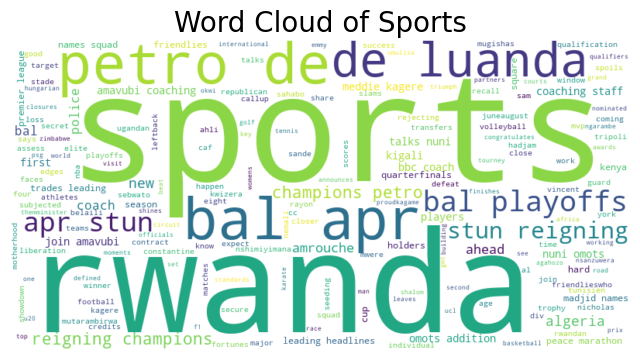

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

#Normalize all text to lowercase
filtered_df['cleaned_data'] = filtered_df['cleaned_data'].astype(str).str.lower()
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    'subscribe', 'epaper', 'jobs', 'tenders', 'advertise', 'submit',
    'newsletter', 'cover', 'cv', 'letter', 'vacancy', 'idea', 'ideas'
])

#Combine all text into a single string
all_text = ' '.join(filtered_df['cleaned_data'].tolist())

#Generate the WordCloud
wordcloud = WordCloud(
    stopwords=custom_stopwords,
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate(all_text)

#the WordCloud
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Sports', fontsize=20)
plt.show()


# Top 20 Frequent Words by Sport
 This highlights the most common words used in each sport

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


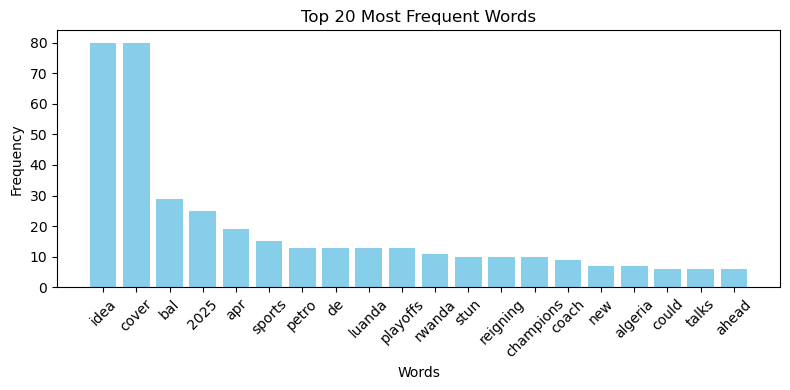

In [51]:
import pandas as pd
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.util import ngrams
import nltk
import matplotlib.pyplot as plt

nltk.download('stopwords')

df = pd.read_csv(r"C:\Users\user\filtered_sports_articles.csv")
if 'cleaned_data' not in df.columns:
    raise ValueError("'cleaned_data' column not found in the dataset.")

all_text = ' '.join(df['cleaned_data'].astype(str))
all_text = re.sub(r'[^\w\s]', '', all_text).lower()

tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(all_text)

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words and len(word) > 1]

word_counts = Counter(filtered_words)
top_20_words = word_counts.most_common(20)

bigrams = list(ngrams(filtered_words, 2))
bigram_counts = Counter(bigrams)
top_10_bigrams = bigram_counts.most_common(10)

trigrams = list(ngrams(filtered_words, 3))
trigram_counts = Counter(trigrams)
top_10_trigrams = trigram_counts.most_common(10)

words_labels, words_values = zip(*top_20_words)
plt.figure(figsize=(8,4))
plt.bar(words_labels, words_values, color='skyblue')
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Top 10 Most Frequent Bigrams
Bigrams (two consecutive words)

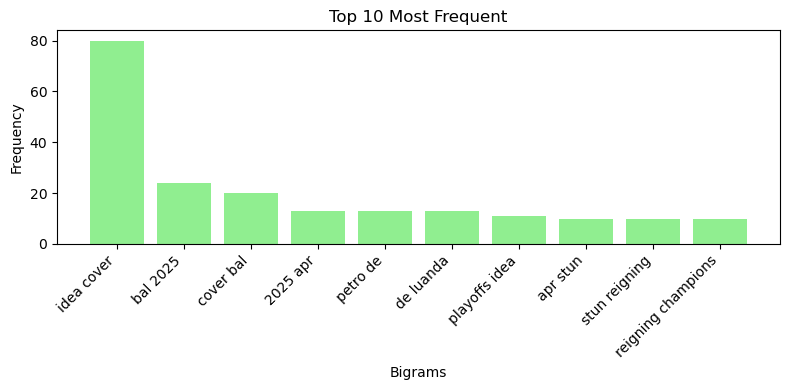

In [49]:

bigram_labels = [' '.join(bigram) for bigram, count in top_10_bigrams]
bigram_values = [count for _, count in top_10_bigrams]

plt.figure(figsize=(8, 4))
plt.bar(bigram_labels, bigram_values, color='lightgreen')
plt.title('Top 10 Most Frequent')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Top 10 Most Frequent Trigrams
Trigrams (three consecutive words) 



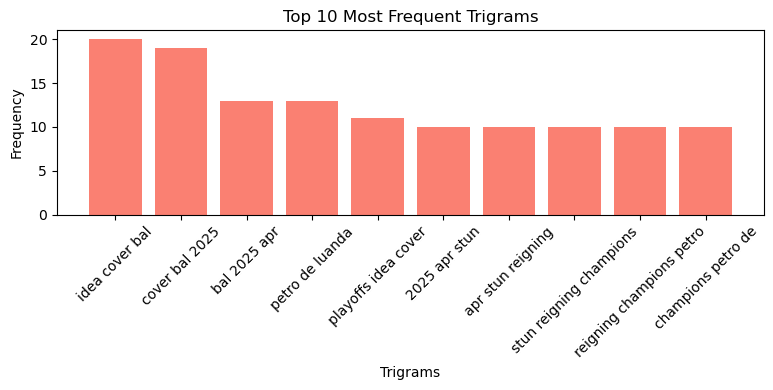

In [47]:
trigram_labels = [' '.join(trigram) for trigram, count in top_10_trigrams]
trigram_values = [count for _, count in top_10_trigrams]
trigram_labels = [' '.join(t) for t, _ in top_10_trigrams]
trigram_values = [count for _, count in top_10_trigrams]
plt.figure(figsize=(8,4))
plt.bar(trigram_labels, trigram_values, color='salmon')
plt.title('Top 10 Most Frequent Trigrams')
plt.xticks(rotation=45)
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()